<a href="https://colab.research.google.com/github/B-Srujana/B-Srujana/blob/main/early_stage_diabetes_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Stage Diabetes Risk Prediction
This notebook demonstrates a full machine learning workflow for predicting early stage diabetes risk using the UCI dataset.

## Project Overview
- Understand and explore the dataset
- Preprocess and clean the data
- Apply and compare multiple machine learning models
- Evaluate model performance
- Visualize key insights

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression



In [65]:
pip install ucimlrepo

In [66]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

# data (as pandas dataframes)
X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets

# metadata
print(early_stage_diabetes_risk_prediction.metadata)

# variable information
print(early_stage_diabetes_risk_prediction.variables)


{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

In [67]:
X.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [68]:
X.shape

(520, 16)

In [69]:
X.dtypes

,0
age,int64
gender,object
polyuria,object
polydipsia,object
sudden_weight_loss,object
weakness,object
polyphagia,object
genital_thrush,object
visual_blurring,object
itching,object


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
dtypes: int64(1), object(15)
me

In [71]:
X.describe()

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [72]:
X.isnull().sum() #Checking the missing values in each coloumn

,0
age,0
gender,0
polyuria,0
polydipsia,0
sudden_weight_loss,0
weakness,0
polyphagia,0
genital_thrush,0
visual_blurring,0
itching,0


In [73]:
# Trying logistic regression
# Splitting data into training and testing sets (e.g., 75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [74]:
# Binary columns in the dataset
binary_cols = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
               'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
               'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']

# Mapping the coloumns
binary_map = {'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0}

# Encoding training and test sets
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()
X_train_enc[binary_cols] = X_train_enc[binary_cols].replace(binary_map)
X_test_enc[binary_cols] = X_test_enc[binary_cols].replace(binary_map)


<ipython-input-74-7c98e8575881>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_enc[binary_cols] = X_train_enc[binary_cols].replace(binary_map)
<ipython-input-74-7c98e8575881>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_enc[binary_cols] = X_test_enc[binary_cols].replace(binary_map)


In [75]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [76]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_enc, y_train_enc)

LogisticRegression(max_iter=200)

In [77]:
y_pred = logreg.predict(X_test_enc)

In [78]:
# Accuracy
accuracy = accuracy_score(y_test_enc, y_pred)

In [79]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred)

In [80]:
# Classification Report
class_report = classification_report(y_test_enc, y_pred)

In [81]:
# ROC AUC
y_prob = logreg.predict_proba(X_test_enc)[:, 1]
roc_auc = roc_auc_score(y_test_enc, y_prob)

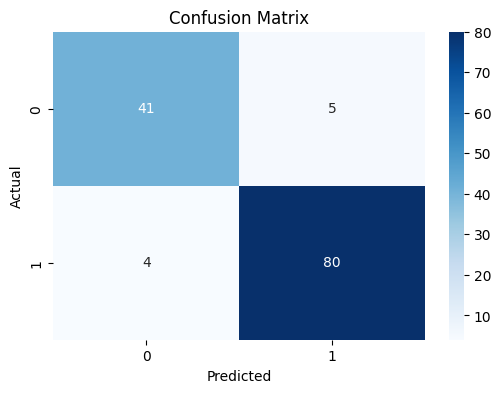

In [82]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print('Classification Report:')
print(class_report)

Accuracy: 0.93
ROC AUC: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130

